# Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from joblib import dump

In [3]:
X_train_all_indices = np.load('../data/X_train_all_indices.npy')
y_train = np.load('../data/y_train.npy')

# Model Training

In [3]:
model_all_indices = RandomForestRegressor()

param_grid = {
    'n_estimators': [250, 500, 750],
    'max_depth': [10, 20, None],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [0.5, 0.75, 1.0]
}

grid_search = GridSearchCV(model_all_indices, param_grid, cv=3, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_all_indices, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': [0.5, 0.75, 1.0],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [250, 500, 750]},
             scoring='neg_mean_absolute_error', verbose=1)

In [4]:
print(f"Best parameters: {grid_search.best_params_}")
model_all_indices = RandomForestRegressor(
    max_depth=20,
    max_features=0.5,
    min_samples_leaf=5,
    min_samples_split=10,
    n_estimators=750)
model_all_indices.fit(X_train_all_indices, y_train)
dump(model_all_indices, '../models/random_forest.joblib')

['../models/random_forest.joblib']

# Model Evaluation

In [7]:
X_test_all_indices = np.load('../data/X_test_all_indices.npy')
y_test = np.load('../data/y_test.npy')

In [8]:
y_pred_all_indices = model_all_indices.predict(X_test_all_indices)

In [10]:
results = pd.DataFrame(columns=['Model', 'MAE'])
results.loc[0] = ['RF', mean_absolute_error(y_test, y_pred_all_indices)]
results

,Model,MAE
0,RF,4.683583


## Visualization of True Labels vs. Predictions

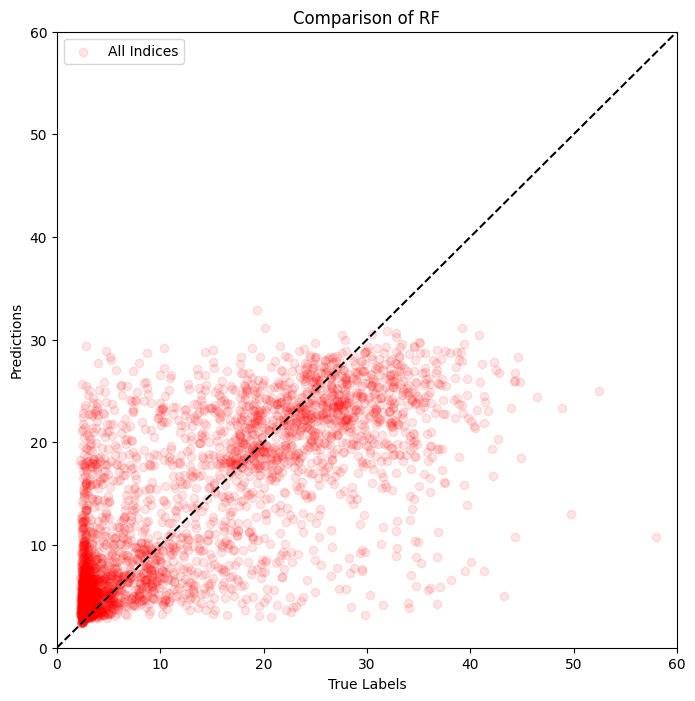

In [11]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_all_indices, color="red", alpha=0.1, label="All Indices")
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Comparison of RF")
plt.legend()

plt.show()